<h1 style="Comic Sans MS; text-align: center; color: #FFC300">KMeans Project: California Housing dataset</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>
<ul style="color: pink">
    <li>We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.</li>
    <li>Perform EDA express.</li>
    <li>Build and train a K-Means model and predict with the test set.</li>
    <li>Once the K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see. This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically and then a supervised learning model.</li>
</ul>

In [12]:
import pandas as pd

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
total_data.shape

(20640, 9)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# Check for missing values
total_data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
# Check for duplicates
total_data.duplicated().sum()

0

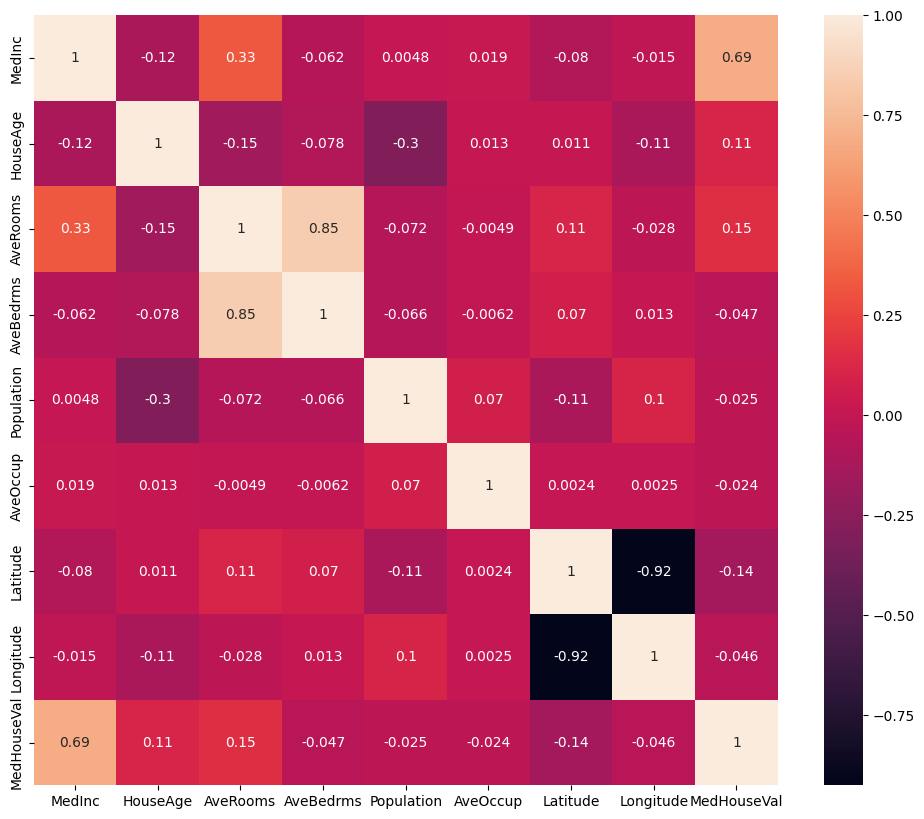

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = total_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


<Axes: xlabel='Longitude', ylabel='Latitude'>

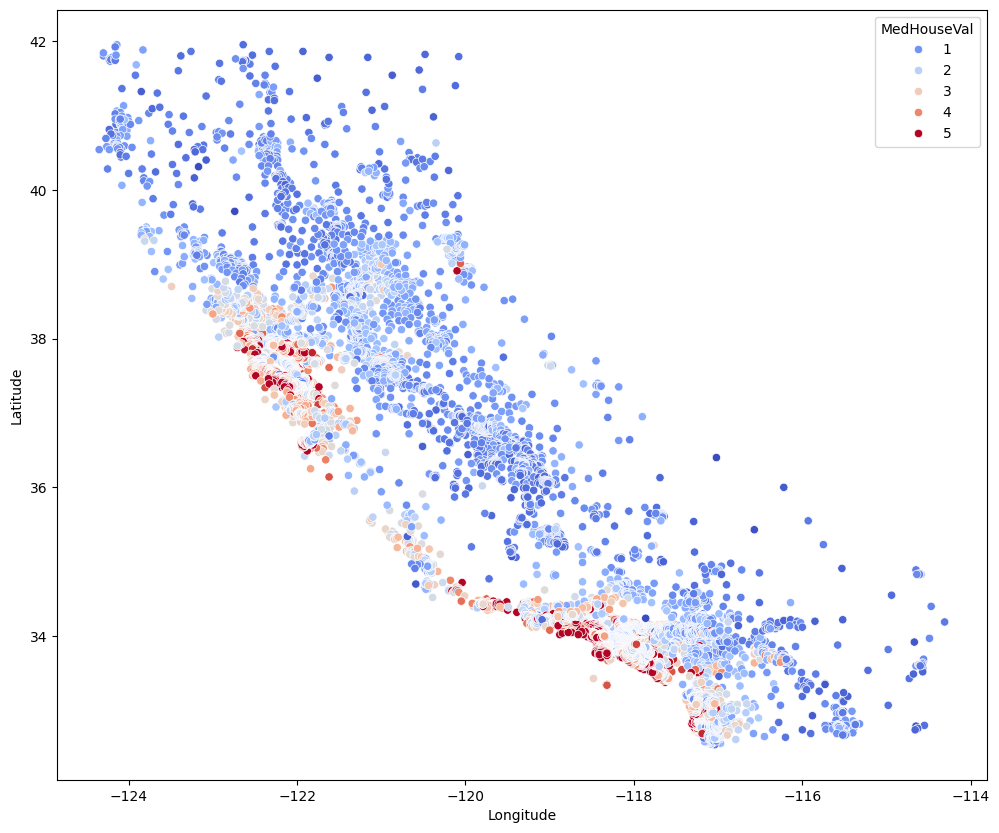

In [11]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=total_data, hue='MedHouseVal', palette='coolwarm')

<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Build a K-Means model</h3>
<p style="color: pink">Given we are required to classify houses according to their region and median income, we are going to remove all the variables except the 'MedInc', 'Latitude', and 'Longitude'.</p>

In [13]:
# Create a new dataset with only the features we want to use for clustering 
data = total_data[['Longitude', 'Latitude', 'MedInc']]
data.head()

,Longitude,Latitude,MedInc
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train.head()

,Longitude,Latitude,MedInc
14196,-117.03,32.71,3.2596
8267,-118.16,33.77,3.8125
17445,-120.48,34.66,4.1563
14265,-117.11,32.69,1.9425
2271,-119.80,36.78,3.5542


In [15]:
# Import the KMeans class from the sklearn library
from sklearn.cluster import KMeans

# Create an instance of the KMeans class
model = KMeans(n_clusters=6, random_state=42)

# Fit the model to the training data
model.fit(X_train)

c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=6, random_state=42)

In [19]:
# With the attribute labels_ we can get the labels of which cluster is associated to each point in the training data
y_train = model.labels_

# Insert the cluster to which each point belongs in the training data
X_train['Cluster'] = y_train
X_train.head()

,Longitude,Latitude,MedInc,Cluster
14196,-117.03,32.71,3.2596,3
8267,-118.16,33.77,3.8125,1
17445,-120.48,34.66,4.1563,1
14265,-117.11,32.69,1.9425,3
2271,-119.80,36.78,3.5542,5


In [24]:
# Show unique values of the cluster column
X_train['Cluster'].unique()

array([3, 1, 5, 0, 2, 4])

In [16]:
# Get the coordinates of the cluster centers
centers = model.cluster_centers_
centers

array([[-121.91549044,   37.68747253,    5.37914949],
       [-118.00301129,   33.88940929,    4.34929638],
       [-118.04112764,   33.84943618,    6.94251551],
       [-118.02425727,   34.04157015,    2.42859805],
       [-120.28422764,   35.87817073,   11.74873415],
       [-121.62299724,   38.14364263,    2.73992841]])

<Axes: xlabel='Longitude', ylabel='Latitude'>

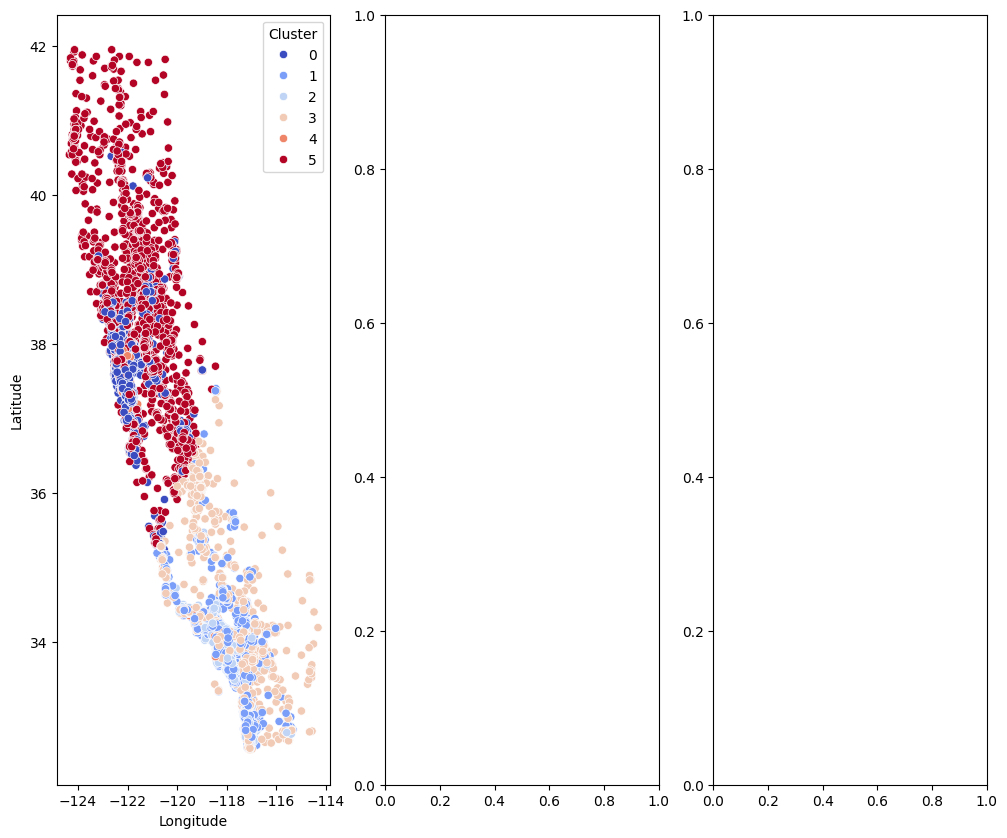

In [25]:
# Plot the clusters 
fig, ax = plt.subplots(1,3, figsize=(12, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=X_train, hue='Cluster', palette='coolwarm', ax=ax[0])